# Preprocessing

## Import libraries

In [ ]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from pathlib import Path
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Methods

In [230]:
# Helper method that truncate scores to four decimals
def truncate(number, digits) -> float:
    nbDecimals = len(str(number).split('.')[1])
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

## Setup data

In [231]:
# Load dataset
heart_dataset = pd.read_csv('./heart_2020_cleaned.csv')

# Copy dataset for processing
heart_dataset_preprocessed = heart_dataset.copy()

# Target column name
target_column = 'HeartDisease'

## Get a feeling for the data

First we look at a part of the data, display statistics for the values, look at the correlation between these and print their data types.

In [232]:
display(heart_dataset.head())
display(heart_dataset.describe(include='all'))
display(heart_dataset_preprocessed.corr())
display(heart_dataset.dtypes)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

**Conclusion**

Numerical values: BMI, PhysicalHealth, MentalHealth, SleepTime

None numerical values: HeartDisease(target), Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease and SkinCancer


Next, we check if there are null values in the data

In [233]:
for column in heart_dataset.columns:
    print(
        "{:<20} {:<2} NaN values".format(column, heart_dataset[column].isna().sum())
    )

HeartDisease         0  NaN values
BMI                  0  NaN values
Smoking              0  NaN values
AlcoholDrinking      0  NaN values
Stroke               0  NaN values
PhysicalHealth       0  NaN values
MentalHealth         0  NaN values
DiffWalking          0  NaN values
Sex                  0  NaN values
AgeCategory          0  NaN values
Race                 0  NaN values
Diabetic             0  NaN values
PhysicalActivity     0  NaN values
GenHealth            0  NaN values
SleepTime            0  NaN values
Asthma               0  NaN values
KidneyDisease        0  NaN values
SkinCancer           0  NaN values


**Conclusion**

No missing values


Next, we look at the target variable and their distribution.

Value      Count      Percentage
No             292422      91.44 %
Yes             27373       8.55 %


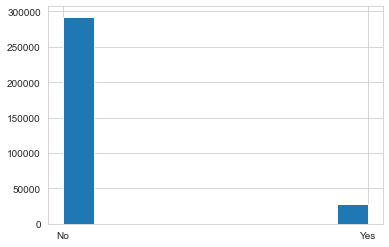

In [234]:
print("{header:<10}".format(header="Value"),
      "{header:<10}".format(header="Count"),
      "{header:<10}".format(header="Percentage")
      )
target_data = heart_dataset_preprocessed[target_column]
for value in target_data.unique():
    value_count = target_data.value_counts()[value]
    percentage_value = value_count/target_data.size*100
    print("{value:<10}".format(value=value),
          "{count:>10}".format(count=value_count),
          "{percentage:>10}".format(percentage=truncate(percentage_value, 2)),
          "%"
          )

plt.hist(heart_dataset_preprocessed[target_column])
plt.show()

**Conclusion**
- HeartDisease column (target) has two distinct values: Yes and No
- The dataset is very unbalanced

## Preprocessing of the target variable

HeartDisease column has two distinct values and is the target variable, so we can use the LabelEncoder for preprocessing.

In [235]:
label_encoder = preprocessing.LabelEncoder()
heart_dataset_preprocessed[target_column] = label_encoder.fit_transform(heart_dataset[target_column])
display(heart_dataset[target_column][0:10])
display(heart_dataset_preprocessed[target_column][0:10])

0     No
1     No
2     No
3     No
4     No
5    Yes
6     No
7     No
8     No
9     No
Name: HeartDisease, dtype: object

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: HeartDisease, dtype: int64

## Preprocessing of numerical features

Numerical features need to be normalized. We are using the common min-max normalization method to convert the data into a scale ranging from 0 to 1.

In [236]:
# List all numerical features
numerical_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

# Use MinMaxScaler to normalize numerical data, as some data isn't normally distributed
scaler = preprocessing.MinMaxScaler()
heart_dataset_preprocessed[numerical_features] = scaler.fit_transform(heart_dataset_preprocessed[numerical_features])

# Quick overview of normalized features
display(heart_dataset_preprocessed[numerical_features].describe())

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.196854,0.112390,0.129946,0.265090
std,0.076737,0.265028,0.265175,0.062435
min,0.000000,0.000000,0.000000,0.000000
25%,0.144996,0.000000,0.000000,0.217391
50%,0.184957,0.000000,0.000000,0.260870
75%,0.234215,0.066667,0.100000,0.304348
max,1.000000,1.000000,1.000000,1.000000


## Preprocessing of the none numerical features

Next we need to look whether the none numerical features are nominal, ordinal or binary, to choose the right encoder. For this we will look at the unique values of each column and then decide.

In [237]:
# List all non-numerical features
none_numerical_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'
]

for feature in none_numerical_features:
    unique_values=heart_dataset_preprocessed[feature].unique()
    print("{feature:<20}".format(feature=feature),
          "{unique_values:<20}".format(unique_values=str(unique_values))
          )

Smoking              ['Yes' 'No']        
AlcoholDrinking      ['No' 'Yes']        
Stroke               ['No' 'Yes']        
DiffWalking          ['No' 'Yes']        
Sex                  ['Female' 'Male']   
AgeCategory          ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race                 ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic             ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity     ['Yes' 'No']        
GenHealth            ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma               ['Yes' 'No']        
KidneyDisease        ['No' 'Yes']        
SkinCancer           ['Yes' 'No']        


**Conclusion:**

Nominal features: Race

Ordinal features:
- AgeCategory: Age has a natural order from low to high
- GenHealth: Has a natural order from poor to excellent
- Diabetic: Yes is more severe than Yes (during pregnancy) more severe than No, borderline diabetes more severe than Yes

Binary features: Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, PhysicalActivity, Asthma, KidneyDisease, SkinCancer

### Encoding ordinal features
Ordinal features have a specific order, so we have to make sure that we encode the features according to that order. For this reason we can't use the sklearn OrdinalEncoder because this encoder uses the alphabetical order which does not fit with our features´ order. That's why we will use a dictionary to define our desired order and apply that order to our features with the pandas .map() function. https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24

#### Diabetic (as ordinal feature, ordered by severity)

Diabetic status may be considered ordinal, as the different states express different severity e.g. only temporarily during pregnancy, having almost diabetic may be viewed as less healthy

In [238]:
# Create dictionary of ordinal to integer mapping
diabetic_order = {'No': 0,
                 'Yes (during pregnancy)': 1/3,
                 'No, borderline diabetes': 2/3,
                 'Yes': 1}

# Apply using map
heart_dataset_preprocessed['Diabetic'] = heart_dataset['Diabetic'].map(diabetic_order)
heart_dataset_preprocessed['Diabetic'].unique()

array([1.        , 0.        , 0.66666667, 0.33333333])

#### AgeCategory

In [239]:
# Create dictionary of ordinal to integer mapping
age_category_order = {'18-24':0,
                      '25-29':1/12,
                      '30-34':2/12,
                      '35-39':3/12,
                      '40-44':4/12,
                      '45-49':5/12,
                      '50-54':6/12,
                      '55-59':7/12,
                      '60-64':8/12,
                      '65-69':9/12,
                      '70-74':10/12,
                      '75-79':11/12,
                      '80 or older':1}

# Using the average of age groups is a standard procedure in econometric literature
# when dealing with age groups (assuming people are getting 110 years old max, but not many 
# so assuming on average 90 years in that age group)
age_category_order = {'18-24': {'avg': 21, 'min': 18, 'max': 24},
                      '25-29': {'avg': 27, 'min': 25, 'max': 29},
                      '30-34': {'avg': 32, 'min': 30, 'max': 34}, 
                     '35-39': {'avg': 37, 'min': 35, 'max': 39},
                      '40-44': {'avg': 42, 'min': 40, 'max': 44},
                      '45-49': {'avg': 47, 'min': 45, 'max': 49}, 
                     '50-54': {'avg': 52, 'min': 50, 'max': 54},
                      '55-59': {'avg': 57, 'min': 55, 'max': 59},
                      '60-64': {'avg': 62, 'min': 60, 'max': 64},
                     '65-69': {'avg': 67, 'min': 65, 'max': 69},
                      '70-74': {'avg': 72, 'min': 70, 'max': 74}, 
                     '75-79': {'avg': 77, 'min': 75, 'max': 79},
                      '80 or older': {'avg': 90, 'min': 80, 'max': 110}}

# Get average of every age group
get_avg = lambda x : age_category_order.get(x).get('avg')

# Apply using map or apply
#heart_dataset_preprocessed['AgeCategory'] = heart_dataset['AgeCategory'].map(age_category_order)
heart_dataset_preprocessed['AgeCategory'] = heart_dataset['AgeCategory'].apply(get_avg)
heart_dataset_preprocessed['AgeCategory']

0         57
1         90
2         67
3         77
4         42
          ..
319790    62
319791    37
319792    47
319793    27
319794    90
Name: AgeCategory, Length: 319795, dtype: int64

#### GenHealth

In [240]:
# Create dictionary of ordinal to integer mapping
gen_health_order = {'Poor':0,
                    'Fair':1/4,
                    'Good':2/4,
                    'Very good':3/4,
                    'Excellent':1}

# Apply using map
heart_dataset_preprocessed['GenHealth'] = heart_dataset['GenHealth'].map(gen_health_order)
heart_dataset_preprocessed['GenHealth']

0         0.75
1         0.75
2         0.25
3         0.50
4         0.75
          ... 
319790    0.25
319791    0.75
319792    0.50
319793    0.50
319794    0.50
Name: GenHealth, Length: 319795, dtype: float64

### Encoding nominal features
Nominal features have no order, so we will use a one-hot-encoder for those features.

In [241]:
nominal_features = ['Race']

# Encoding
one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(heart_dataset[nominal_features]).toarray(),
                               columns=one_hot_encoder.get_feature_names_out(nominal_features))
# Joining
heart_dataset_preprocessed = heart_dataset_preprocessed.drop(columns=nominal_features)
heart_dataset_preprocessed = heart_dataset_preprocessed.join(one_hot_encoded)
heart_dataset_preprocessed[one_hot_encoder.get_feature_names_out(nominal_features)]

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
319790,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.0,0.0,0.0,1.0,0.0,0.0
319792,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.0,0.0,0.0,1.0,0.0,0.0


### Encoding binary features
For binary features we want to encode them with 0 and 1, but we have to make sure that we always use the same number for the same value. For example 1 for yes and 0 for no.

#### Yes/No Features

In [242]:
yes_no_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma',
                   'KidneyDisease', 'SkinCancer']

# Encode yes/no features
for feature in yes_no_features:
    heart_dataset_preprocessed[feature] = heart_dataset[feature].replace({'Yes':1, 'No':0})
    
heart_dataset_preprocessed[yes_no_features]

,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,1,1,0,1
1,0,0,1,0,1,0,0,0
2,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
319790,1,0,0,1,0,1,0,0
319791,1,0,0,0,1,1,0,0
319792,0,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,0,0


#### Sex

In [243]:
# Encode Sex feature
heart_dataset_preprocessed['Sex'] = heart_dataset['Sex'].replace({'Female':1, 'Male':0})
heart_dataset_preprocessed['Sex']

0         1
1         1
2         0
3         1
4         1
         ..
319790    0
319791    0
319792    1
319793    1
319794    1
Name: Sex, Length: 319795, dtype: int64

In [244]:
# Quick overview of the encoded data
display(heart_dataset_preprocessed.columns)
display(heart_dataset_preprocessed.head())

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,0.055294,1,0,0,0.100000,1.0,0,1,57,...,0.173913,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.100447,0,0,1,0.000000,0.0,0,1,90,...,0.260870,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.175782,1,0,0,0.666667,1.0,0,0,67,...,0.304348,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.147169,0,0,0,0.000000,0.0,0,1,77,...,0.217391,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.141132,0,0,0,0.933333,0.0,1,1,42,...,0.304348,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


## Clustering

We want to find out if it is beneficial to cluster the data in preprocessing. For this we apply the TSNE method.

/Users/benediktluth/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/benediktluth/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/benediktluth/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/benediktluth/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-

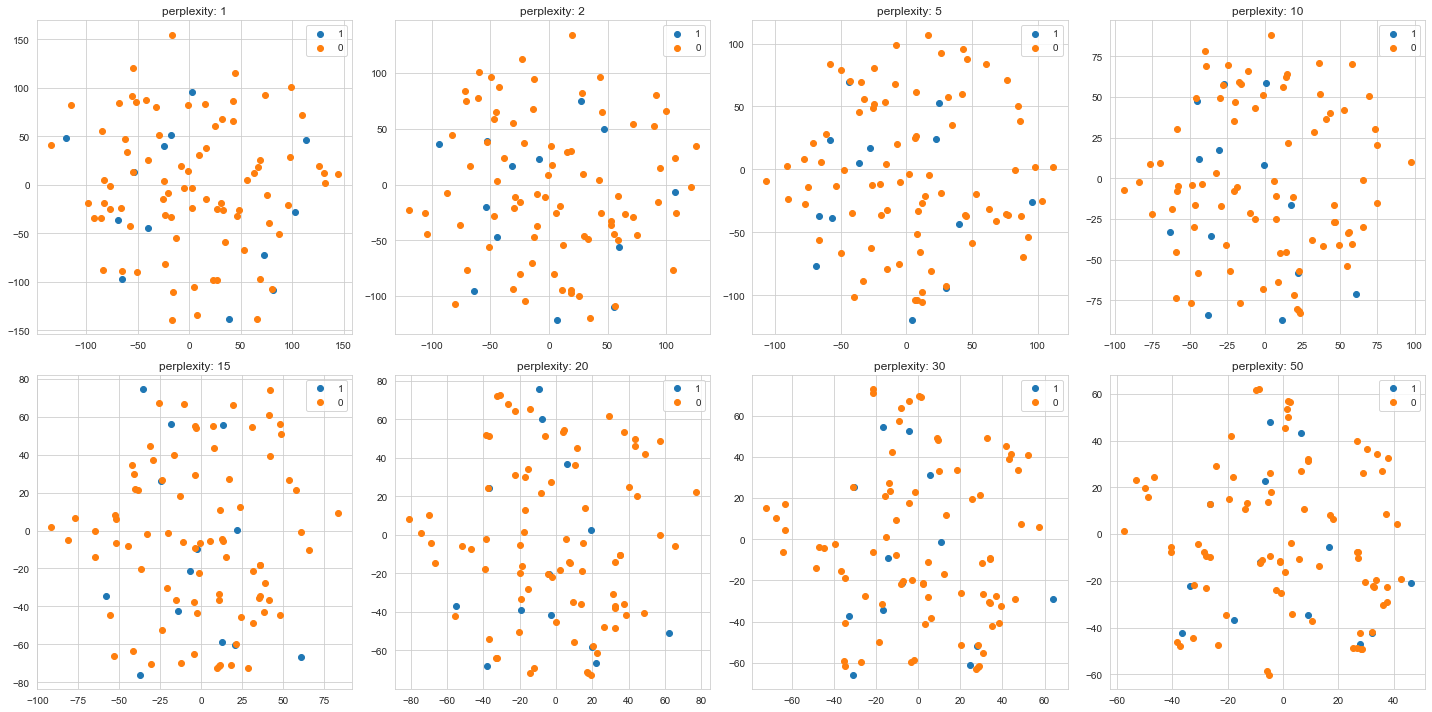

In [270]:
clustering_model_columns = list(set(heart_dataset_preprocessed.columns) - set(['Race_Other', 'AgeCategory']))
X = heart_dataset_preprocessed[clustering_model_columns].sample(n=5000, random_state=42).dropna()
X_cluster = X.drop(columns=[target_column])

figure = plt.figure(figsize=(20, 10))
figure_index = 1

# TODO BL: @FL do we really need that much perplexity values? It's pretty time-consuming (around 10 minutes on my machine)
perplexity_ls = [1, 2, 5, 10, 15, 20, 30, 50]
for perplexity in perplexity_ls:
    # TODO BL: @FL if possible, please remove the future warning
    tsne = TSNE(n_components=2,
                learning_rate=5,
                init='pca',
                perplexity=perplexity,
                random_state=42,
                n_iter=3000,
                n_jobs=-1
                )

    X_tsne_embedded = tsne.fit_transform(X_cluster)
    X_tsne_embedded_concat = pd.merge(X, pd.DataFrame(X_tsne_embedded), left_index=True, right_index=True)

    ax = figure.add_subplot(2, 4, figure_index)
    ax.set_title("perplexity: {}".format(perplexity))

    heart_disease_ls = [1, 0]
    for has_heart_disease in heart_disease_ls:
        points_to_plot = X_tsne_embedded_concat.loc[X_tsne_embedded_concat[target_column] == has_heart_disease, :]
        ax.scatter(y=points_to_plot[0], x=points_to_plot[1], label=has_heart_disease)

    ax.legend()
    figure_index += 1

plt.tight_layout()
plt.show()

**Conclusion**

TSNE results show that a clustering is not beneficial.

## Visualization

In the next section, we look at the preprocessed data from different angles. The goal is to determine how the features relate to each other and to the target variable.

In [246]:
all_features = heart_dataset_preprocessed.columns[1:]

First we look at the distribution of features.

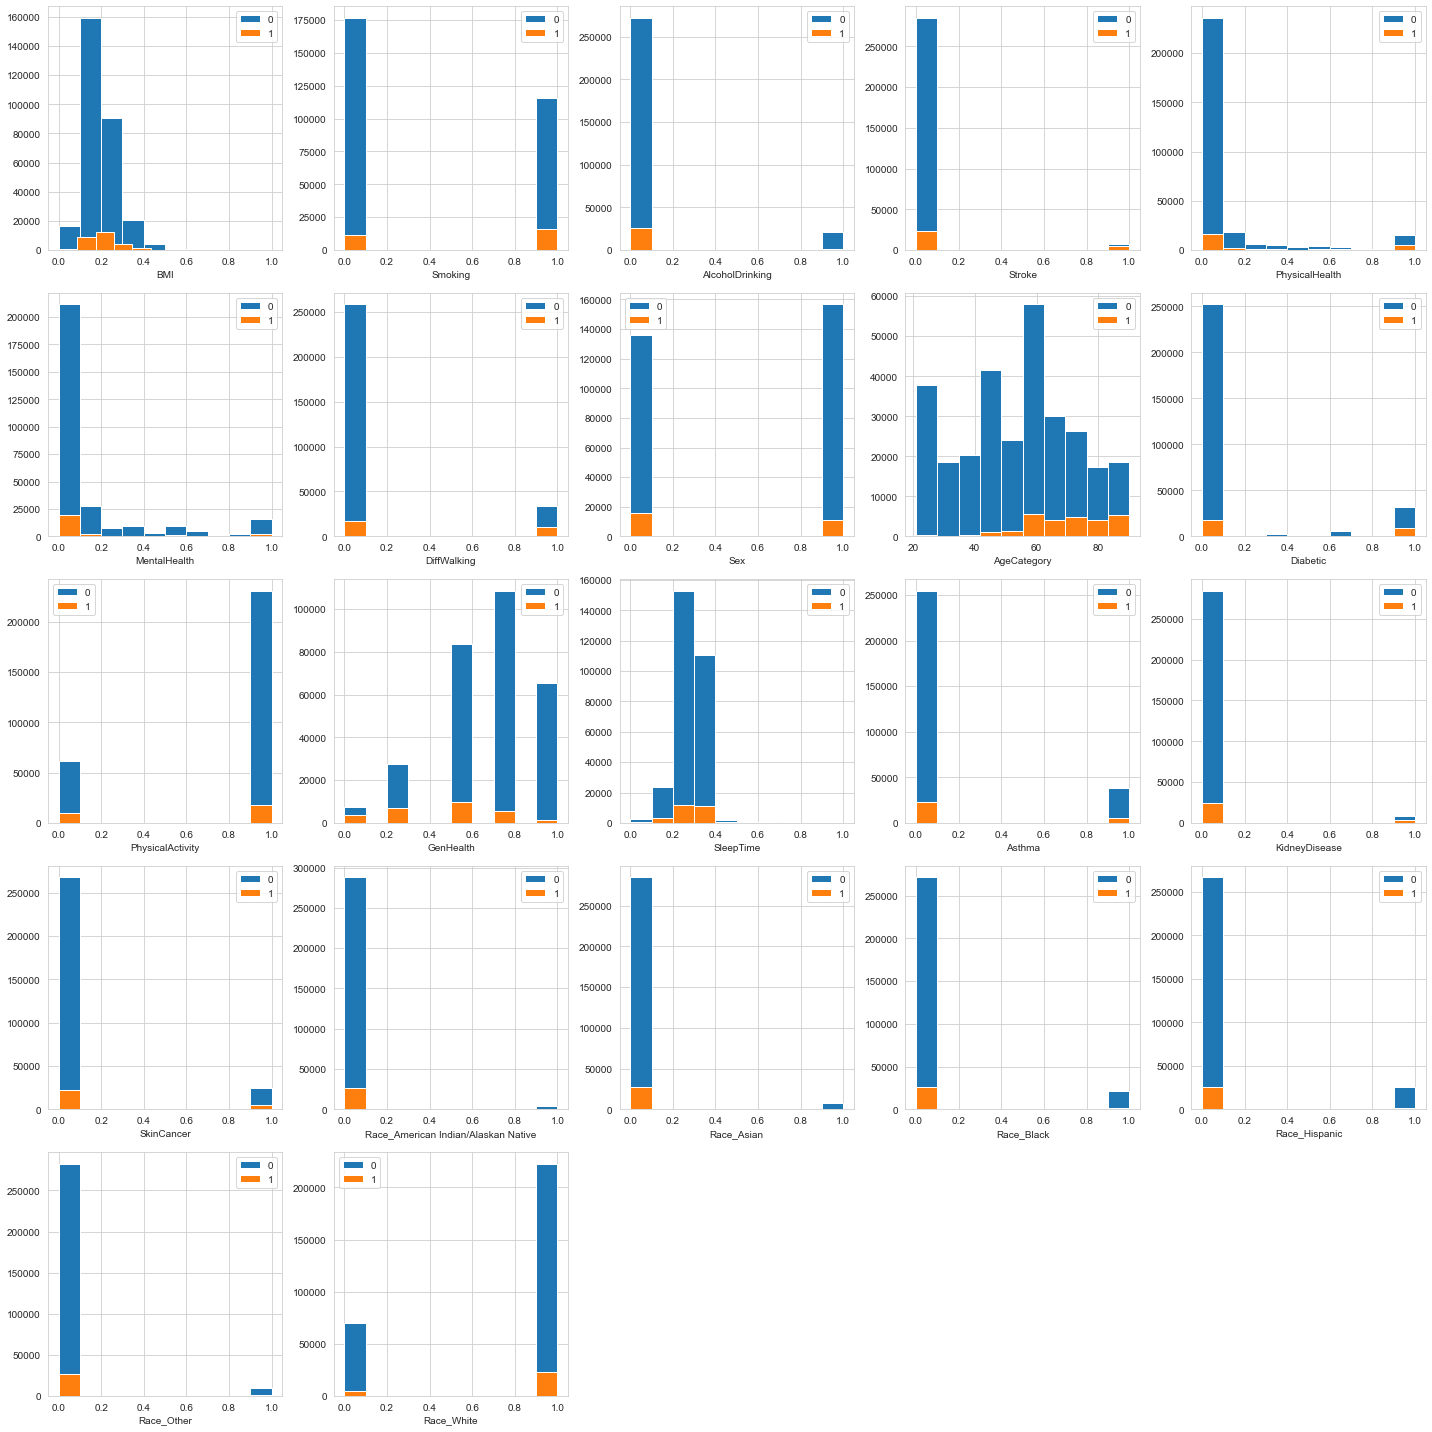

In [263]:
figure_histograms = plt.figure(figsize=(20, 20))
figure_index = 1

for current_feature in all_features:
    ax = figure_histograms.add_subplot(5, 5, figure_index)
    for has_heart_disease, group in heart_dataset_preprocessed.groupby(target_column):
        # plot the data points for the current group and feature combination
        ax.hist(group[current_feature], label=has_heart_disease)
        ax.set_xlabel(current_feature)
        ax.legend()
    figure_index += 1

plt.tight_layout()
plt.show()

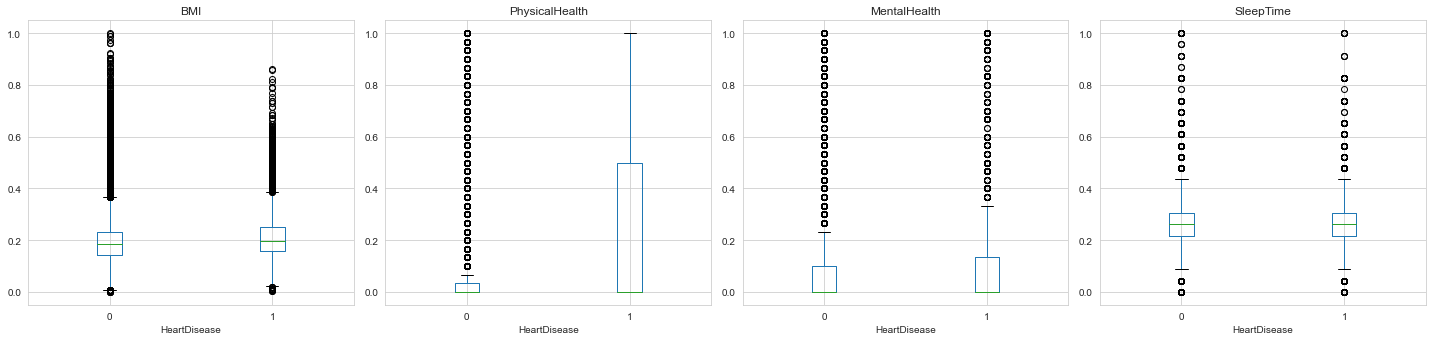

In [262]:
figure_boxplots = plt.figure(figsize=(20, 5))
figure_index = 1

for current_feature in numerical_features:
    ax = figure_boxplots.add_subplot(1, 4, figure_index)
    heart_dataset_preprocessed.boxplot(column=[current_feature], by=target_column, ax=ax)
    figure_index += 1

plt.suptitle('')
plt.tight_layout()
plt.show()

**Conclusion**

TODO BL: @FL Add conclusion

Next, let's look at the correlation between the different features.

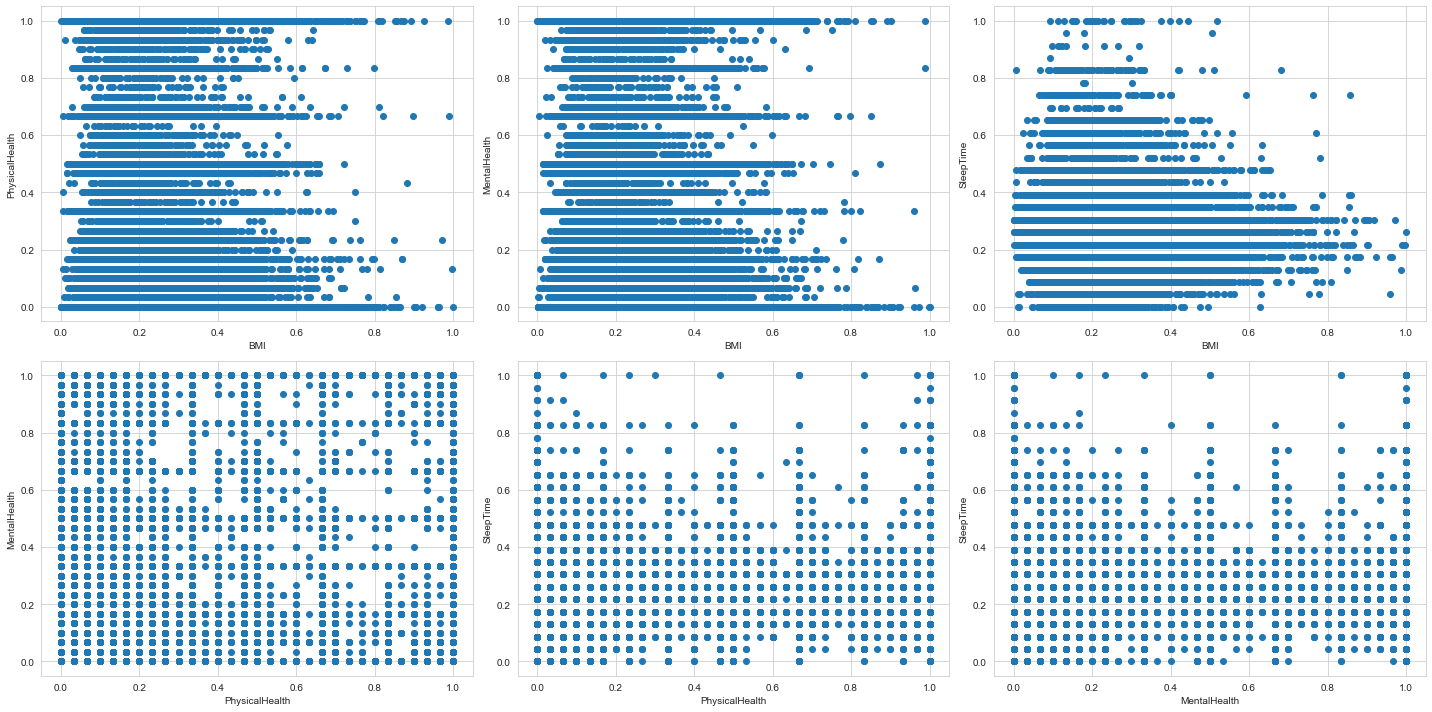

In [261]:
figure_scatters = plt.figure(figsize=(20, 10))
figure_index = 1

# Create all possible combinations of the features
combinations = itertools.combinations(numerical_features, 2)

for combination in combinations:
    axs = figure_scatters.add_subplot(2, 3, figure_index)
    axs.scatter(heart_dataset_preprocessed[combination[0]],
                heart_dataset_preprocessed[combination[1]])

    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])

    figure_index += 1

plt.tight_layout()
plt.show()

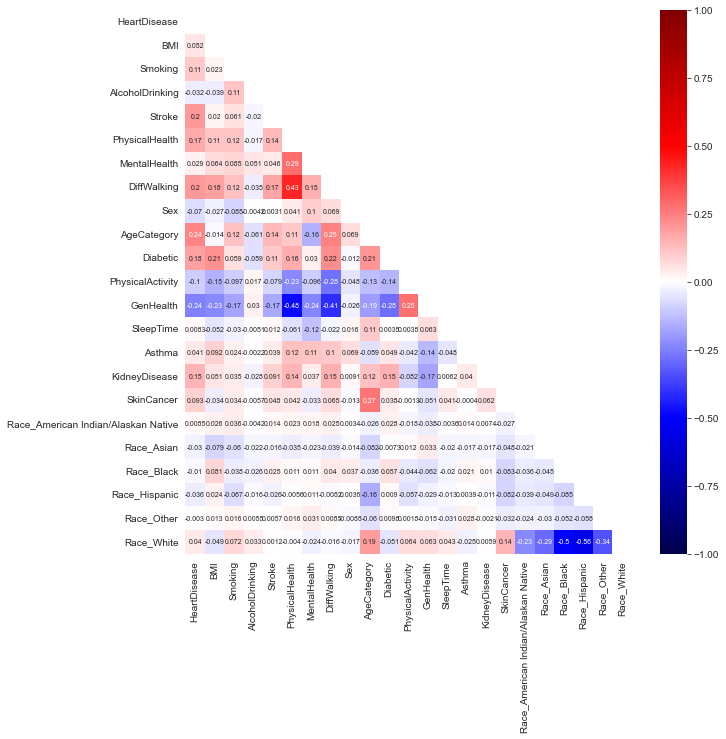

In [266]:
plt.figure(figsize = (10,10))
heart_dataset_preprocessed_corr = heart_dataset_preprocessed.corr()
mask = np.triu(np.ones_like(heart_dataset_preprocessed_corr, dtype=bool))
sns.heatmap(heart_dataset_preprocessed_corr,
            mask=mask,
            vmin=-1,
            vmax=1,
            cmap="seismic",
            annot=True,
            annot_kws={"size": 7})
plt.show()

**Conclusion**

TODO BL: @FL Add conclusion

Next, let's look at the features in the pair plot

<Figure size 720x720 with 0 Axes>

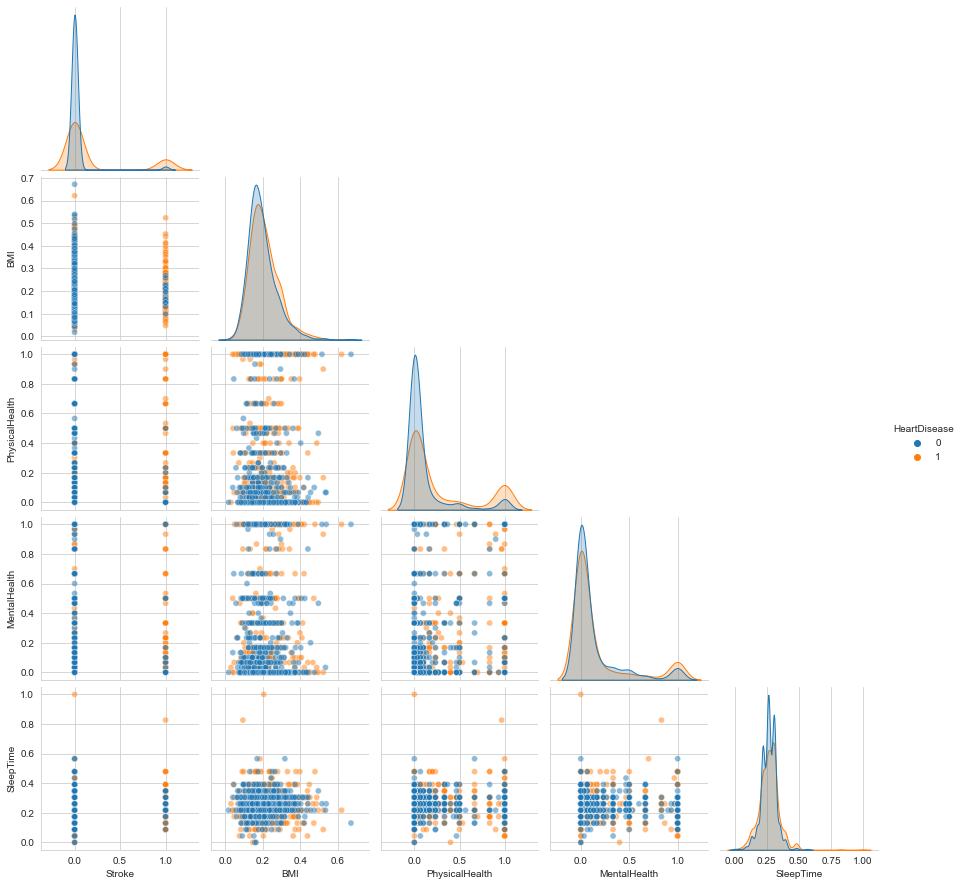

In [269]:
plt.figure(figsize = (10,10))

columns_for_pair_plot = [target_column, "Stroke"] + numerical_features
# TODO BL: @FL please improve - variable that is directly overridden? That's a code smell
equally_distributed_dataset = heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 1, columns_for_pair_plot].sample(n=1000, random_state=42)
equally_distributed_dataset = pd.concat([equally_distributed_dataset, heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 0, columns_for_pair_plot].sample(n=1000, random_state=42)])

hue_order = [0, 1]
sns.pairplot(equally_distributed_dataset, hue=target_column, hue_order=hue_order, corner=True, plot_kws={'alpha': 0.5})

plt.show()

**Conclusion**

TODO BL: @FL Add conclusion

TODO BL: @FL please add description what you are doing in the following section; improve code quality and consistency according to the sections above, e.g., by putting several representations in one figure; remove errors and warnings

[Text(0, 0.5, '')]

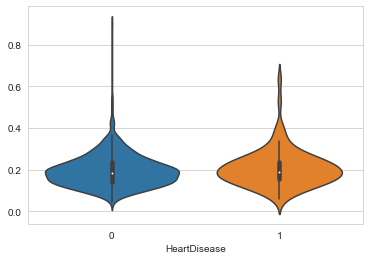

In [252]:
subset_data = heart_dataset_preprocessed.sample(n=1000, random_state=42)

ax = sns.violinplot(data=subset_data, x=target_column, y="BMI")
ax.set(ylabel="")

/Users/benediktluth/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/benediktluth/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/benediktluth/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/benediktluth/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='GenHealth', ylabel='PhysicalHealth'>

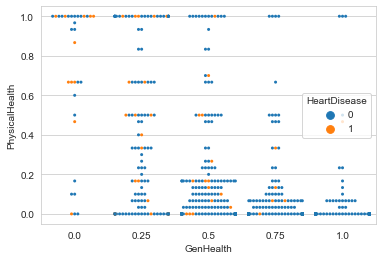

In [253]:
sns.swarmplot(data=subset_data, x="GenHealth", y="PhysicalHealth", hue=target_column, size=3)

<AxesSubplot:xlabel='GenHealth', ylabel='PhysicalHealth'>

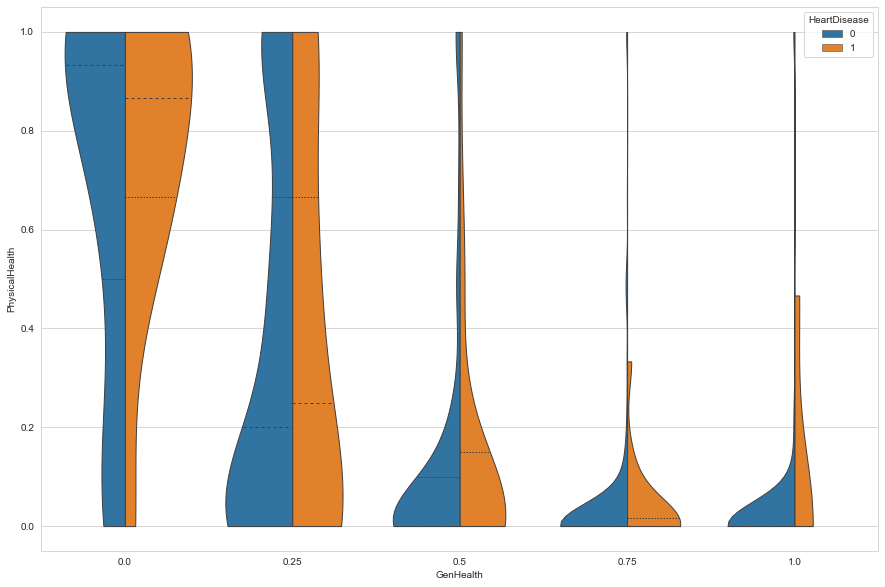

In [254]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data=subset_data, x="GenHealth", y="PhysicalHealth", hue=target_column, split=True, inner="quart", linewidth=1, cut=0)

<AxesSubplot:xlabel='GenHealth', ylabel='MentalHealth'>

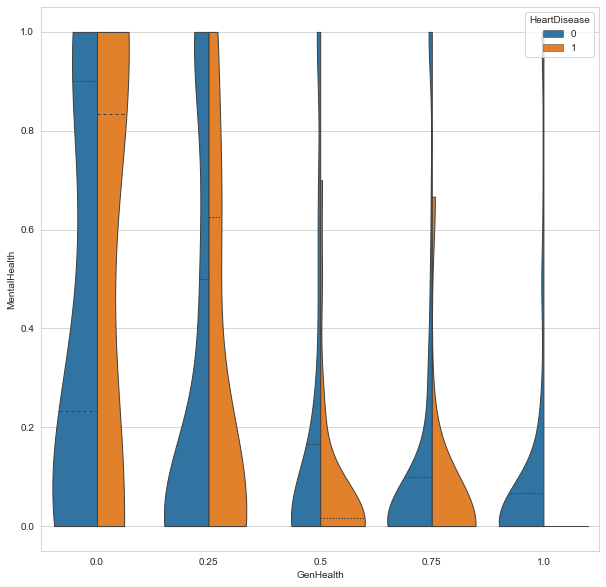

In [255]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(data=subset_data, x="GenHealth", y="MentalHealth", hue=target_column, split=True, inner="quart", linewidth=1, cut=0)

In [256]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data=subset_data, x="DiffWalking", y="PhysicalHealth", hue="target_column, split=True, inner="quart", linewidth=1, cut=0)

SyntaxError: invalid syntax (629397845.py, line 2)

In [ ]:
sns.displot(
    data=subset_data,
    x="AgeCategoryAvg", hue="GenHealth",
    kind="kde", multiple="fill", clip=(0,1), palette="ch:rot=-.25,hue=1,light=.75",
)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data=heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 1, :], x="AgeCategoryAvg", bw_adjust=4, ax=ax, cut=0, label="Heart Disease", color="red", fill=True)
sns.kdeplot(data=heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 0, :], x="AgeCategoryAvg", bw_adjust=4, ax=ax, cut=0, label="No Heart Disease", color="green", fill=True)

ax.legend()
plt.tight_layout()
plt.show()

**Conclusion**

TODO BL: @FL Add conclusion

## Feature Selection

Our dataset has many features. A core aspect of preprocessing is feature selection. Based on the previous visualization and the conclusions derived from it, unimportant features are now removed and new features are created by using the interaction effect.

In [ ]:
# TODO BL: @FL implement feature selection
# maybe drop one Race column and one diabetic column as over-specified if all those are taken into the model

Now we are through with the preprocessing and can save the preprocessed dataset.

In [ ]:
# Save preprocessed data
filepath = Path('./heart_dataset_preprocessed.csv')
heart_dataset_preprocessed.to_csv(filepath, index=False)